In [1]:
import sys
import os

sys.path.append('/dfs/scratch0/vschen/metal')
os.environ['METALHOME'] = '/dfs/scratch0/vschen/metal'

In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from metal.contrib.slicing.synthetics.geometric_synthetics import generate_dataset

In [3]:
from metal.contrib.slicing.metrics import calc_slice_acc, calc_heads_acc

RUN_NAME = "test"

In [4]:
from metal.contrib.slicing.online_dp import MLPModule

# NOTE: each model can take a "train_kwargs"

### SHARED PIECES
train_kwargs = {
    "n_epochs": 40,
    "lr": 0.01,
    "l2": 1e-4,
    "log_unit": "epochs",
#     "log_train_metrics_func": None,
#     "log_train_metrics": ["loss"],
    "log_train_every": 1,
    "log_valid_every": 1,
    "log_valid_metrics_func": [calc_slice_acc],
    "log_valid_metrics": ["accuracy"],
    "checkpoint": True,
    "checkpoint_metric": "accuracy",
    "writer": "tensorboard",
    "log_dir": f"{os.environ['METALHOME']}/tensorboard/",
    "run_name": RUN_NAME,
}

end_model_init_kwargs = {
    "layer_out_dims": [2, 10, 10, 2],
}

### FULL CONFIGS
uni_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "train_kwargs": train_kwargs
}

up_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "upweight_search_space": {"range": [1, 5]},
    "max_search": 5,
    "train_kwargs": train_kwargs
}

moe_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "expert_train_kwargs": {"n_epochs": 10, "verbose": False},
    "train_kwargs": {"verbose": False},
    "gating_dim": 5,
    "train_kwargs": train_kwargs
}

print("WARNING: Pay attention to slice weight!")


base_dp_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "slice_kwargs": {
        "vanilla": True,
        "verbose": True,
    },
    "train_kwargs": train_kwargs
}

sm_dp_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "slice_kwargs": {
        "L_weight": 0.1,
        "online_head": False,
        "indicator": True,
        "mask_abstains": False,
        "verbose": True,
    },
    "train_kwargs": train_kwargs
}

sm_on_config = {
    "end_model_init_kwargs": end_model_init_kwargs,
    "slice_kwargs": {
        "L_weight": 0.1,
        "Y_off_weight": 0.1,
        "online_head": True,
        "indicator": False,
        "mask_abstains": True,
        "verbose": True,
    },
    "train_kwargs": train_kwargs
}



Salt: 918880
Pepper: 0.1


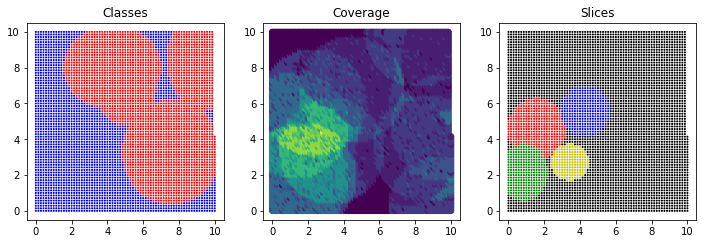

[Trial 0]
---------- Training DP ----------
Added pepper=0.1 random negatives on 0/10 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=True)
)

Default to SliceMaster
Overriding options to create vanilla EndModel.
Resetting base model parameters
SliceMaster(
  (body): Sequential(
    (0): IdentityModule()
    (1): Sequential(
      (0): Linear(in_features=2, out_features=10, bias=True)
      (1): ReLU()
    )
    (2): Sequential(
      (0): Linear(in_features=10, out_features=10, bias=True)
      (1): ReLU()
    )
  )
  (Y_head_off): Linear(in_features=10, out_features=1, bias=True)
  (Y_criteria): BCEWithLogitsLoss()
)

[1 epo]: TRAIN:[loss=21.125] VALID:[slice_1=1.000, slice_2=0.264, slice_3=1.000, slice_4=1.000, accuracy=0.75

[12 epo]: TRAIN:[loss=17.642] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.903]
[13 epo]: TRAIN:[loss=17.594] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.910]
[14 epo]: TRAIN:[loss=17.554] VALID:[slice_1=1.000, slice_2=0.889, slice_3=1.000, slice_4=1.000, accuracy=0.924]
[15 epo]: TRAIN:[loss=17.580] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.930]
Saving model at iteration 15 with best score 0.930
[16 epo]: TRAIN:[loss=17.582] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.922]
[17 epo]: TRAIN:[loss=17.556] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.913]
[18 epo]: TRAIN:[loss=17.527] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.907]
[19 epo]: TRAIN:[loss=17.594] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000, accuracy=0.911]
[20 epo]: TRAIN:[loss=17.488] VALID:[slice_1=

[29 epo]: TRAIN:[loss=17.450] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.911]
[30 epo]: TRAIN:[loss=17.412] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.907]
[31 epo]: TRAIN:[loss=17.396] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.899]
[32 epo]: TRAIN:[loss=17.399] VALID:[slice_1=1.000, slice_2=0.861, slice_3=1.000, slice_4=1.000, accuracy=0.912]
[33 epo]: TRAIN:[loss=17.452] VALID:[slice_1=1.000, slice_2=0.819, slice_3=1.000, slice_4=1.000, accuracy=0.896]
[34 epo]: TRAIN:[loss=17.403] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.905]
[35 epo]: TRAIN:[loss=17.408] VALID:[slice_1=1.000, slice_2=0.861, slice_3=1.000, slice_4=1.000, accuracy=0.899]
[36 epo]: TRAIN:[loss=17.439] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.909]
[37 epo]: TRAIN:[loss=17.380] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000,

[1 epo]: TRAIN:[loss=19.255] VALID:[slice_1=1.000, slice_2=0.736, slice_3=1.000, slice_4=1.000, accuracy=0.841]
Saving model at iteration 1 with best score 0.841
[2 epo]: TRAIN:[loss=18.455] VALID:[slice_1=1.000, slice_2=0.778, slice_3=1.000, slice_4=1.000, accuracy=0.858]
Saving model at iteration 2 with best score 0.858
[3 epo]: TRAIN:[loss=18.260] VALID:[slice_1=1.000, slice_2=0.500, slice_3=1.000, slice_4=1.000, accuracy=0.851]
[4 epo]: TRAIN:[loss=18.159] VALID:[slice_1=1.000, slice_2=0.847, slice_3=1.000, slice_4=1.000, accuracy=0.890]
Saving model at iteration 4 with best score 0.890
[5 epo]: TRAIN:[loss=17.995] VALID:[slice_1=0.931, slice_2=0.792, slice_3=1.000, slice_4=1.000, accuracy=0.874]
[6 epo]: TRAIN:[loss=17.851] VALID:[slice_1=1.000, slice_2=0.708, slice_3=1.000, slice_4=1.000, accuracy=0.897]
Saving model at iteration 6 with best score 0.897
[7 epo]: TRAIN:[loss=17.716] VALID:[slice_1=1.000, slice_2=0.819, slice_3=1.000, slice_4=1.000, accuracy=0.908]
Saving model at 

[18 epo]: TRAIN:[loss=17.509] VALID:[slice_1=1.000, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.922]
[19 epo]: TRAIN:[loss=17.537] VALID:[slice_1=1.000, slice_2=0.917, slice_3=1.000, slice_4=1.000, accuracy=0.919]
[20 epo]: TRAIN:[loss=17.505] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000, accuracy=0.883]
[21 epo]: TRAIN:[loss=17.517] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.932]
[22 epo]: TRAIN:[loss=17.469] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000, accuracy=0.932]
[23 epo]: TRAIN:[loss=17.426] VALID:[slice_1=0.990, slice_2=0.875, slice_3=1.000, slice_4=1.000, accuracy=0.902]
[24 epo]: TRAIN:[loss=17.503] VALID:[slice_1=0.990, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.908]
[25 epo]: TRAIN:[loss=17.449] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.911]
[26 epo]: TRAIN:[loss=17.473] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000,

[37 epo]: TRAIN:[loss=19.416] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.910]
[38 epo]: TRAIN:[loss=19.443] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.910]
[39 epo]: TRAIN:[loss=19.476] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.904]
[40 epo]: TRAIN:[loss=19.401] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.920]
Restoring best model from iteration 34 with score 0.920
Finished Training
Accuracy: 0.920
        y=1    y=2   
 l=1    682     5    
 l=2    95     468   
---------- Training SM_DP ----------
Added pepper=0.1 random negatives on 0/10 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=Tr

[7 epo]: TRAIN:[loss=17.790] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.886]
[8 epo]: TRAIN:[loss=17.687] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.896]
Saving model at iteration 8 with best score 0.896
[9 epo]: TRAIN:[loss=17.609] VALID:[slice_1=0.941, slice_2=0.778, slice_3=1.000, slice_4=1.000, accuracy=0.814]
[10 epo]: TRAIN:[loss=17.653] VALID:[slice_1=1.000, slice_2=0.806, slice_3=1.000, slice_4=1.000, accuracy=0.890]
[11 epo]: TRAIN:[loss=17.567] VALID:[slice_1=1.000, slice_2=0.944, slice_3=1.000, slice_4=1.000, accuracy=0.903]
Saving model at iteration 11 with best score 0.903
[12 epo]: TRAIN:[loss=17.507] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.906]
Saving model at iteration 12 with best score 0.906
[13 epo]: TRAIN:[loss=17.493] VALID:[slice_1=1.000, slice_2=0.958, slice_3=1.000, slice_4=1.000, accuracy=0.894]
[14 epo]: TRAIN:[loss=17.590] VALID:[slice_1=1.000, slice_2=

[26 epo]: TRAIN:[loss=19.459] VALID:[slice_1=1.000, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.901]
[27 epo]: TRAIN:[loss=19.486] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.908]
[28 epo]: TRAIN:[loss=19.468] VALID:[slice_1=1.000, slice_2=0.875, slice_3=1.000, slice_4=1.000, accuracy=0.894]
[29 epo]: TRAIN:[loss=19.438] VALID:[slice_1=1.000, slice_2=0.889, slice_3=1.000, slice_4=1.000, accuracy=0.906]
[30 epo]: TRAIN:[loss=19.398] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000, accuracy=0.871]
[31 epo]: TRAIN:[loss=19.473] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.889]
[32 epo]: TRAIN:[loss=19.437] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.894]
[33 epo]: TRAIN:[loss=19.438] VALID:[slice_1=1.000, slice_2=0.931, slice_3=1.000, slice_4=1.000, accuracy=0.894]
[34 epo]: TRAIN:[loss=19.474] VALID:[slice_1=1.000, slice_2=0.861, slice_3=1.000, slice_4=1.000,

[1 epo]: TRAIN:[loss=19.238] VALID:[slice_1=1.000, slice_2=0.639, slice_3=1.000, slice_4=1.000, accuracy=0.850]
Saving model at iteration 1 with best score 0.850
[2 epo]: TRAIN:[loss=18.457] VALID:[slice_1=1.000, slice_2=0.417, slice_3=1.000, slice_4=1.000, accuracy=0.816]
[3 epo]: TRAIN:[loss=18.268] VALID:[slice_1=1.000, slice_2=0.681, slice_3=1.000, slice_4=1.000, accuracy=0.867]
Saving model at iteration 3 with best score 0.867
[4 epo]: TRAIN:[loss=18.199] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=0.974, accuracy=0.874]
Saving model at iteration 4 with best score 0.874
[5 epo]: TRAIN:[loss=18.084] VALID:[slice_1=1.000, slice_2=0.694, slice_3=1.000, slice_4=1.000, accuracy=0.866]
[6 epo]: TRAIN:[loss=17.945] VALID:[slice_1=1.000, slice_2=0.764, slice_3=1.000, slice_4=1.000, accuracy=0.866]
[7 epo]: TRAIN:[loss=17.823] VALID:[slice_1=0.980, slice_2=0.833, slice_3=1.000, slice_4=0.974, accuracy=0.834]
[8 epo]: TRAIN:[loss=17.758] VALID:[slice_1=0.990, slice_2=0.931, 

[19 epo]: TRAIN:[loss=19.386] VALID:[slice_1=1.000, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.891]
[20 epo]: TRAIN:[loss=19.430] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.891]
[21 epo]: TRAIN:[loss=19.411] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.893]
[22 epo]: TRAIN:[loss=19.363] VALID:[slice_1=0.990, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.922]
[23 epo]: TRAIN:[loss=19.468] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.924]
Saving model at iteration 23 with best score 0.924
[24 epo]: TRAIN:[loss=19.545] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.902]
[25 epo]: TRAIN:[loss=19.385] VALID:[slice_1=1.000, slice_2=0.819, slice_3=1.000, slice_4=1.000, accuracy=0.895]
[26 epo]: TRAIN:[loss=19.365] VALID:[slice_1=1.000, slice_2=0.875, slice_3=1.000, slice_4=1.000, accuracy=0.897]
[27 epo]: TRAIN:[loss=19.399] VALID:[slice_1=

[37 epo]: TRAIN:[loss=17.439] VALID:[slice_1=1.000, slice_2=0.847, slice_3=1.000, slice_4=1.000, accuracy=0.907]
[38 epo]: TRAIN:[loss=17.558] VALID:[slice_1=1.000, slice_2=0.972, slice_3=1.000, slice_4=1.000, accuracy=0.902]
[39 epo]: TRAIN:[loss=17.392] VALID:[slice_1=1.000, slice_2=0.903, slice_3=1.000, slice_4=1.000, accuracy=0.904]
[40 epo]: TRAIN:[loss=17.422] VALID:[slice_1=0.980, slice_2=0.875, slice_3=1.000, slice_4=1.000, accuracy=0.902]
Restoring best model from iteration 31 with score 0.930
Finished Training
Accuracy: 0.930
        y=1    y=2   
 l=1    680     7    
 l=2    81     482   
---------- Training SM_ON ----------
Added pepper=0.1 random negatives on 0/10 LFs

Network architecture:
Sequential(
  (0): IdentityModule()
  (1): Sequential(
    (0): Linear(in_features=2, out_features=10, bias=True)
    (1): ReLU()
  )
  (2): Sequential(
    (0): Linear(in_features=10, out_features=10, bias=True)
    (1): ReLU()
  )
  (3): Linear(in_features=10, out_features=2, bias=Tr

In [27]:
%%time
from collections import defaultdict

from metal.label_model import MajorityLabelVoter
from metal.utils import split_data
from metal.contrib.backends.snorkel_gm_wrapper import SnorkelLabelModel
from metal.contrib.slicing.experiment_utils import (
    create_data_loader,
    train_model,
    train_slice_dp,
    search_upweighting_models,
    eval_model
)
from metal.contrib.slicing.utils import get_L_weights_from_targeting_lfs_idx
from metal.contrib.slicing.mixture_of_experts import train_MoE_model


model_configs = {
#     "UNI": uni_config,
#     "UP": up_config,
#     "MoE": moe_config,
    "DP": base_dp_config,
    'SM_DP': sm_dp_config,
    "SM_ON": sm_on_config,
}

NUM_TRIALS = 5
NUM_SLICES = 4
K = 2
M = 10
N = 5000
unipolar = False
pepper = 0.1
# A base to add to trial number to set a unique seed for each trial
# salt = np.random.randint(1e6)
salt = 918880

print(f"Salt: {salt}")
if pepper:
    print(f"Pepper: {pepper}")

    
L_kwargs = {
    'min_r': 3,
    'max_r': 7 if unipolar else 3,
    'min_acc': 0.9,
    'max_acc': 1.0
}
Z_kwargs = {'num_slices': NUM_SLICES}
L, X, Y, Z, targeting_lfs_idx = generate_dataset(K, M, N, 
                                                 L_kwargs=L_kwargs,
                                                 Z_kwargs=Z_kwargs,
                                                 unipolar=unipolar,
                                                 slice_source="conflicts",
#                                                  seed=(salt + trial),
                                                 seed = salt,
                                                 plotting=True)

Ls, Xs, Ys, Zs = split_data(L, X, Y, Z, splits=[0.5, 0.25, 0.25], shuffle=True)
L_train_raw = Ls[0].copy() # TEMP
    
history = defaultdict(list)
for trial in range(NUM_TRIALS):
    print(f"[Trial {trial}]")
    
    for model_name, model_config in model_configs.items():
        print ("-"*10, "Training", model_name, "-"*10)

        Ls[0] = L_train_raw.copy() # TEMP: Reset to unpeppered version
        
        # Generate weak labels:
        if model_name == "UNI":
            Y_train = MajorityLabelVoter().predict_proba(Ls[0])
        else:
            label_model = SnorkelLabelModel()
            label_model.train_model(Ls[0])
            Y_train = label_model.predict_proba(Ls[0])
        Ys[0] = Y_train
        
        from metal.contrib.slicing.utils import add_pepper
        Ls[0] = add_pepper(Ls[0], pepper)        
        
        # Train end model
        if model_name == "UNI":
            model = train_model(model_config, Ls, Xs, Ys, Zs)
        elif model_name == 'UP':
            # generates weighted Y_train and overwrites overwrites Ys[0] internally
            model = search_upweighting_models(model_config, Ls, Xs, Ys, Zs, 
                                              targeting_lfs_idx, verbose=False)
        elif model_name == "MoE":
            model = train_MoE_model(model_config, Ls, Xs, Ys, Zs)
        else:
            model = train_model(model_config, Ls, Xs, Ys, Zs)
            
        test_loader = create_data_loader(Ls, Xs, Ys, Zs, model_config, 'test')
        results = eval_model(model, test_loader, verbose=False, summary=False)        
        
        # Save results
        history[model_name].append(results)

In [34]:
from metal.contrib.slicing.experiment_utils import parse_history

print(f"Average (n={NUM_TRIALS}):")
df = parse_history(history, NUM_SLICES)
df

Average (n=5):


,DP,SM_DP,SM_ON
all,0.927520,0.940320,0.931360
slice_1,1.000000,1.000000,1.000000
slice_2,0.929114,0.921519,0.934177
slice_3,1.000000,1.000000,1.000000
slice_4,1.000000,1.000000,1.000000
slice_avg,0.982278,0.980380,0.983544


In [33]:
SLICE_NAME = 'slice_2'
for model_name, scores in history.items():
    print(model_name)
    for s in scores:
        print(s[SLICE_NAME]['accuracy'])

DP
0.9367088607594937
0.9113924050632911
0.9113924050632911
0.9620253164556962
0.9240506329113924
SM_DP
0.8607594936708861
0.9367088607594937
0.9240506329113924
0.9367088607594937
0.9493670886075949
SM_ON
0.9493670886075949
0.9240506329113924
0.9367088607594937
0.9113924050632911
0.9493670886075949


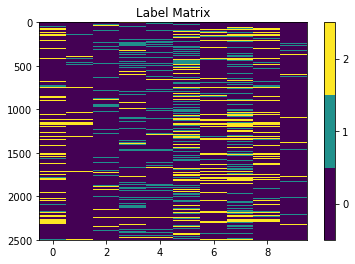

In [8]:
from metal.contrib.visualization.analysis import view_label_matrix
view_label_matrix(Ls[0])